
<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Привет! Меня зовут - Сысоева Вера.
    
Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные - всё сделано правильно; жёлтые - есть замечания, но не критично; красные - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта.

# Аналитика в авиакомпании

«F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки, больше сотен перелётов каждый день. Необходимо понять предпочтения пользователей, покупающих билеты на те или иные направления.
Требуется изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

## Парсинг  

In [1]:
import pandas as pd
import requests 
from bs4 import BeautifulSoup

In [2]:
URL='https://code.s3.yandex.net/learning-materials/data-analyst/festival_news/index.html'
req = requests.get(URL) # 
soup = BeautifulSoup(req.text, 'lxml')

In [3]:
table = soup.find('table', attrs = {'id':'best_festivals'})

In [4]:
content=[]  
heading_table = []

for row in table.find_all('th'):
    heading_table.append(row.text)

for row in table.find_all('tr'):
    if not row.find_all('th'): 
        content.append([element.text for element in row.find_all('td')])

festivals  = pd.DataFrame(content, columns=heading_table) 
festivals

,Название фестиваля,Место проведения,Дата проведения
0,Музыкальный фестиваль «Усадьба Jazz»,Екатеринбург,01.07.2018
1,Фестиваль музыки и технологий Alfa Future People,Нижний Новгород,10.08.2018
2,"Фестиваль еды «О, да! Еда!»",Санкт-Петербург,21.07.2018
3,Доброфест,Ярославль,29.07.2018
4,Park Live,Москва,28.07.2018
5,Пикник Афиши,Москва,04.08.2018
6,VK FEST,Санкт-Петербург,29.07.2018
7,"Фестиваль «О, да! Еда!»",Иркутск,25.08.2018
8,"Фестиваль «О, да! Еда!»",Владивосток,02.09.2018
9,Видфест,Москва,08.09.2018


***

## SQL  

### База данных об авиаперевозках.  
Таблица `airports` — информация об аэропортах:
* **airport_code** — трёхбуквенный код аэропорта
* **airport_name** — название аэропорта
* **city** — город
* **timezone** — временная зона

Таблица `aircrafts` — информация о самолётах:
* **aircraft_code** — код модели самолёта
* **model** — модель самолёта
* **range** — количество самолётов

Таблица `tickets` — информация о билетах:
* **ticket_no** — уникальный номер билета
* **passenger_id** — персональный идентификатор пассажира
* **passenger_name** — имя и фамилия пассажира

Таблица `flights` — информация о рейсах:
* **flight_id** — уникальный идентификатор рейса
* **departure_airport** — аэропорт вылета
* **departure_time** — дата и время вылета
* **arrival_airport** — аэропорт прилёта
* **arrival_time** — дата и время прилёта
* **aircraft_code** – id самолёта

Таблица `ticket_flights` — стыковая таблица «рейсы-билеты»
* **ticket_no** — номер билета
* **flight_id** — идентификатор рейса

Таблица `festivals` — информация о фестивалях
* **festival_id** — уникальный номер фестиваля
* **festival_date** — дата проведения фестиваля
* **festival_city** — город проведения фестиваля
* **festival_name** — название фестиваля   

Пояснение: В базе данных нет прямой связи между таблицами airports и festivals, а также festivals и flights. Но вы можете писать JOIN и связывать эти таблицы по городу проведения фестиваля (festival_city) и городу аэропорта (city). Потребуется некоторое преобразование дат в flights, и тогда данную таблицу также можно будет связать по дате проведения фестиваля (festival_date) в запросах с JOIN.

Изучите таблицу airports и выведите список городов (city), в которых есть аэропорты.

SELECT DISTINCT city
FROM  airports


Изучите таблицу flights и подсчитайте количество вылетов (flight_id) из каждого аэропорта вылета (departure_airport). Назовите переменную cnt_flights и выведите её вместе со столбцом departure_airport — сначала departure_airport, потом cnt_flights. Результат отсортируйте в порядке убывания количества вылетов.

SELECT 
    departure_airport,
    COUNT (flight_id) AS cnt_flights
FROM  flights
GROUP BY
    departure_airport
ORDER BY
cnt_flights DESC

Найдите количество рейсов на каждой модели самолёта с вылетом в сентябре 2018 года. Назовите получившийся столбец flights_amount и выведите его, также выведите столбец model.
Столбцы выводите в таком порядке:
model
flights_amount

SELECT 
    DISTINCT model,
  --  departure_time::date AS date,
   -- DATE_TRUNC('month',departure_time::date ) AS date,
    COUNT (flight_id) AS flights_amount
FROM  flights
LEFT JOIN aircrafts ON aircrafts.aircraft_code = flights.aircraft_code
WHERE 
   DATE_TRUNC('month',departure_time::date ) = '2018-09-01'
GROUP BY
    model

4.
Посчитайте количество рейсов по всем моделям самолетов Boeing и Airbus в сентябре. Назовите получившуюся переменную flights_amount и выведите её.

SELECT
    COUNT(flights.flight_id) AS flights_amount,
    CASE
        WHEN aircrafts.model LIKE 'Boeing%' THEN 'Boeing'
        WHEN aircrafts.model LIKE 'Airbus%' THEN 'Airbus'
    END AS type_aircraft    
FROM  flights
LEFT JOIN aircrafts ON aircrafts.aircraft_code = flights.aircraft_code
WHERE 
   DATE_TRUNC('month',departure_time::date ) = '2018-09-01'
GROUP BY
    type_aircraft


Посчитайте среднее количество прибывающих рейсов в день для каждого города за август 2018 года. Назовите получившееся поле average_flights, вместе с ним выведите столбец city.
Выводите столбцы в таком порядке: - city - average_flights

SELECT
   subq.city AS city,
   AVG(subq.flights_amount) AS average_flights
FROM
 
    (SELECT
        airports.city AS city,
        EXTRACT (DAY FROM flights.arrival_time) AS day_number,
        COUNT(flights.flight_id) AS flights_amount
    FROM
        airports
   INNER JOIN flights ON flights.arrival_airport = airports.airport_code
    WHERE
        CAST(flights.departure_time AS DATE)  BETWEEN '2018-08-01' AND '2018-08-31'
    GROUP BY
        city, day_number) AS subq
 
GROUP BY
    subq.city



/*SELECT
    city,
    AVG(SUBQ.cnt_flights) AS average_flights
FROM (SELECT
    airports.city AS city,
   -- departure_time::date AS date,
    COUNT(flights.flight_id) AS cnt_flights
FROM  flights
LEFT JOIN airports ON airports.airport_code = flights.arrival_airport
WHERE 
   DATE_TRUNC('month',departure_time::date ) = '2018-08-01'
GROUP BY
     city,
     departure_time::date) AS SUBQ
GROUP BY
     SUBQ.city*/

Установите фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили. Выведите название фестиваля festival_name и номер недели festival_week.  

SELECT
   festivals.festival_name AS festival_name,
   EXTRACT (WEEK FROM CAST(festivals.festival_date AS date)) AS festival_week
FROM
    festivals
WHERE 
    (CAST(festival_date AS date) BETWEEN '2018-07-23' AND '2018-09-30')
    AND festivals.festival_city = 'Москва'

Для каждой недели с 23 июля по 30 сентября 2018 года посчитайте количество билетов, купленных на рейсы в Москву (номер недели week_number и количество билетов ticket_amount). Получите таблицу, в которой будет информация о количестве купленных за неделю билетов; отметка, проходил ли в эту неделю фестиваль; название фестиваля festival_name и номер недели week_number.
Выводите столбцы в таком порядке: - week_number - ticket_amount - festival_week - festival_name  

SELECT
    SBQ1.departure_week AS week_number,
    SBQ1.ticket_amount AS ticket_amount,
    SBQ2.festival_week AS festival_week,
    SBQ2.festival_name AS festival_name
FROM 

    (SELECT 
        EXTRACT(WEEK FROM flights.departure_time) AS departure_week,
        COUNT(ticket_flights.ticket_no) AS ticket_amount
    FROM
        flights
    INNER JOIN ticket_flights ON ticket_flights.flight_id = flights.flight_id
    INNER JOIN airports ON airports.airport_code = flights.arrival_airport 
    WHERE 
    (flights.departure_time::date BETWEEN '2018-07-23' AND '2018-09-30') AND
    (airports.city = 'Москва')
    GROUP BY
    departure_week 
    ) AS SBQ1
LEFT JOIN

    (SELECT
        festival_name AS festival_name,
        EXTRACT(WEEK FROM festival_date) AS festival_week
    FROM
        festivals
    WHERE
        festival_city = 'Москва' AND
        CAST(festivals.festival_date AS date) BETWEEN '2018-07-23' AND '2018-09-30') 
    
    AS SBQ2 ON SBQ2.festival_week = SBQ1.departure_week
GROUP BY
    week_number,
    ticket_amount,
    festival_week,
    festival_name

***

## Выгрузка данных

In [38]:
# Импортируем необходимые библиотеки и модули
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [39]:
# Считаем данные из датасета query_1, проверим корректность выгрузки
query_1 = pd.read_csv('/datasets/query_1.csv')
query_1.head(10)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [40]:
# Расмотрим общую информацию о данных
query_1.info()
query_1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


В таблице содержатся результат первого запроса из базы данных:  
* **model** — модель самолета
* **flights_amount** — количество рейсов для каждой модели самолетов model в сентябре 2018 года

В данных нет пропусков, типы данных также верны. Данных в датасете крайне мало, поэтому уинформация может быть не репрезентативной.

<div style="border:solid gold 2px; padding: 20px"> <h1 style="color:gold; margin-bottom:20px">Комментарий наставника</h1>

Здесь можно было отметить, что у нас в распоряжении достаточно небольшие наборы агрегированных данных. С этим может быть связан ряд ограничений.

<div style="border:solid blue 2px; padding: 20px"> <h1 style="color:blue; margin-bottom:20px">Комментарий Ученика</h1>  Исправил

***

In [41]:
# Считаем данные из датасета query_3, проверим корректность выгрузки
query_3 = pd.read_csv('/datasets/query_3.csv')
query_3.head(10)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


In [42]:
# Расмотрим общую информацию о данных
query_3.info()
query_3.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


В таблице содержатся результат третьего  запроса из базы данных:  
* **city** — город
* **average_flights** — среднее количество рейсов, прибывающих в город city за день в августе 2018 года

В данных нет пропусков, типы данных также верны.

## Анализ 

In [43]:
# Выберем топ-10 городов по количеству рейсов;
top_10 = query_3.sort_values('average_flights', ascending=False).head(10)
top_10

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


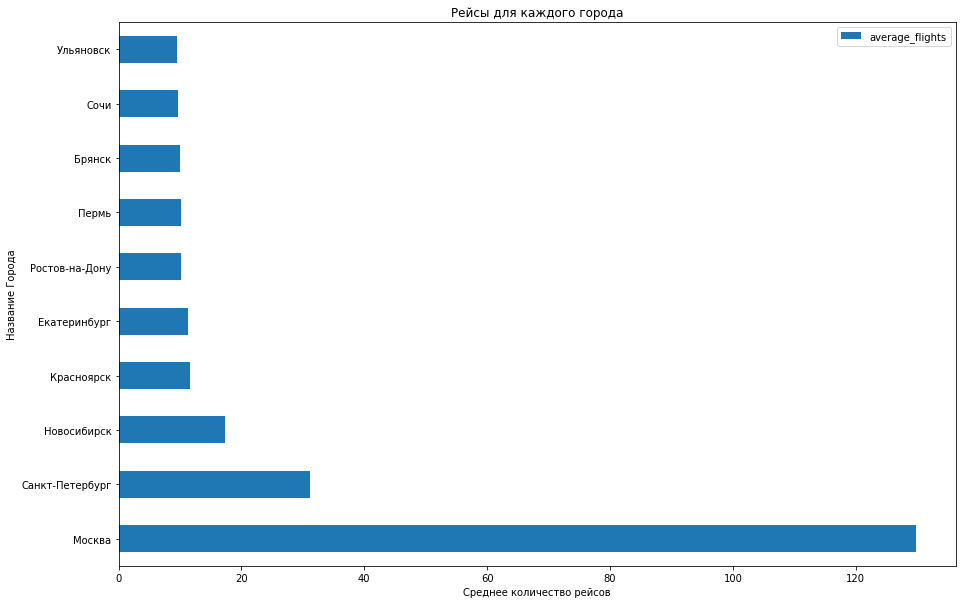

In [44]:
#  Построим график для топа
top_10.plot(x='city', y='average_flights', kind='barh', figsize=(15,10) )
plt.xlabel('Среднее количество рейсов')
plt.ylabel('Название Города')
plt.title('Рейсы для каждого города')
plt.show()

Видим, что количество рейсов для Москвы в разы превышает количество для остальных городов.

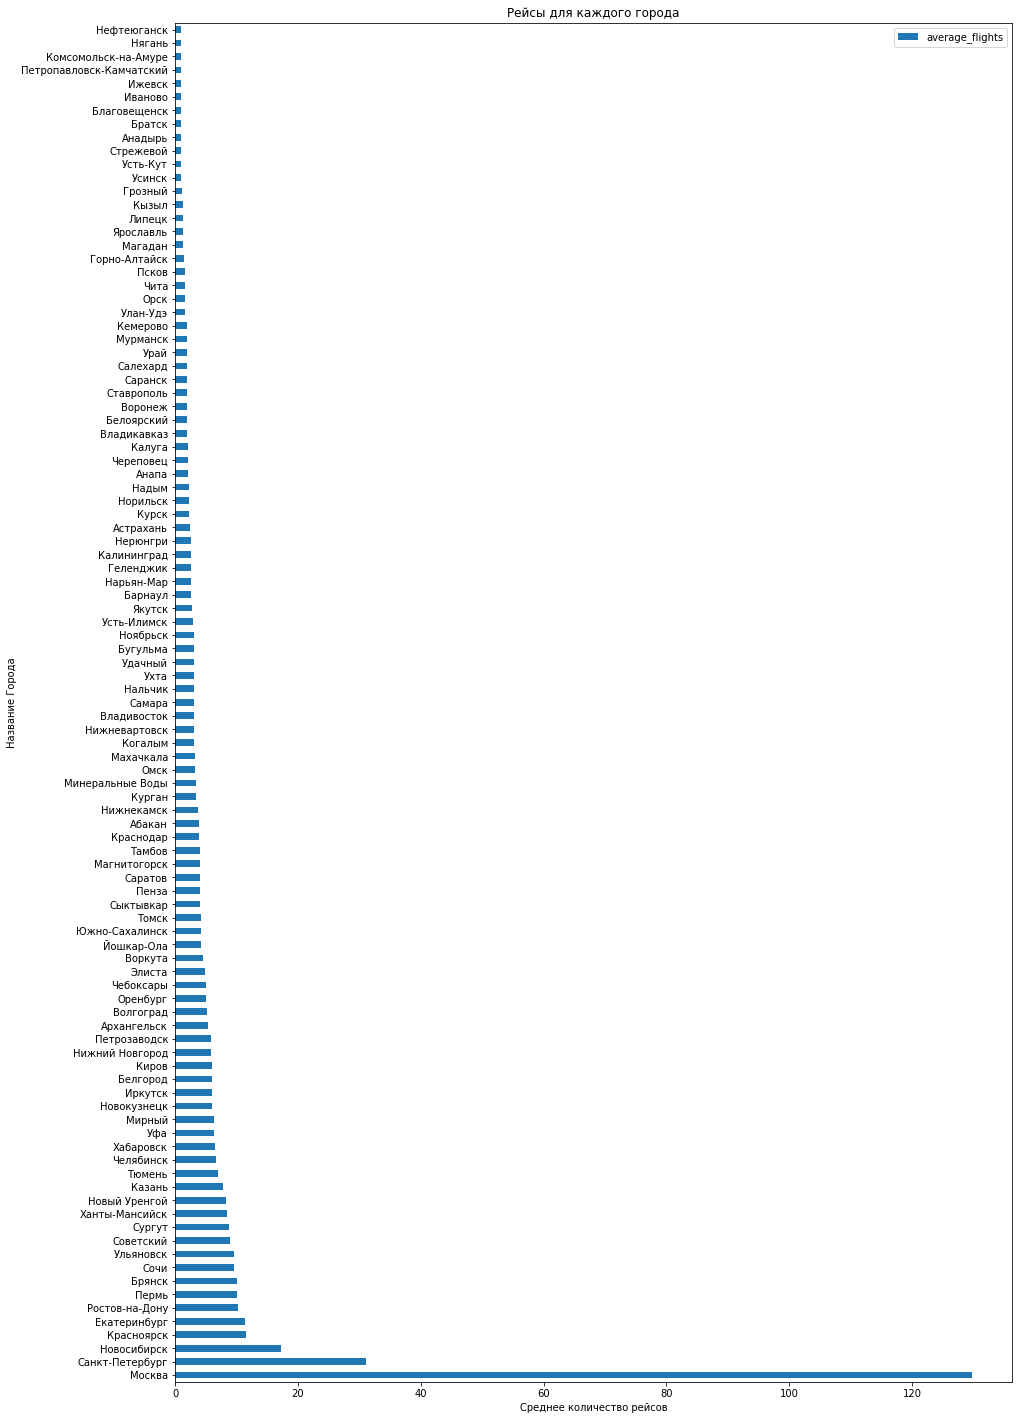

In [45]:
# Построим график для всех городов. Для удобства уберем подписи оси Х
query_3.sort_values('average_flights', ascending=False).plot(x='city', y='average_flights', kind='barh', figsize=(15,25))
plt.xlabel('Среднее количество рейсов')
plt.ylabel('Название Города')
plt.title('Рейсы для каждого города')
plt.show( )

<div style="border:solid red 2px; padding: 20px"> <h1 style="color: red; margin-bottom:20px">Комментарий наставника</h1>

Надо сделать подписи на графике.

<div style="border:solid blue 2px; padding: 20px"> <h1 style="color:blue; margin-bottom:20px">Комментарий Ученика</h1>  Исправил

На общем фоне Москва выделяется еще сильнее.

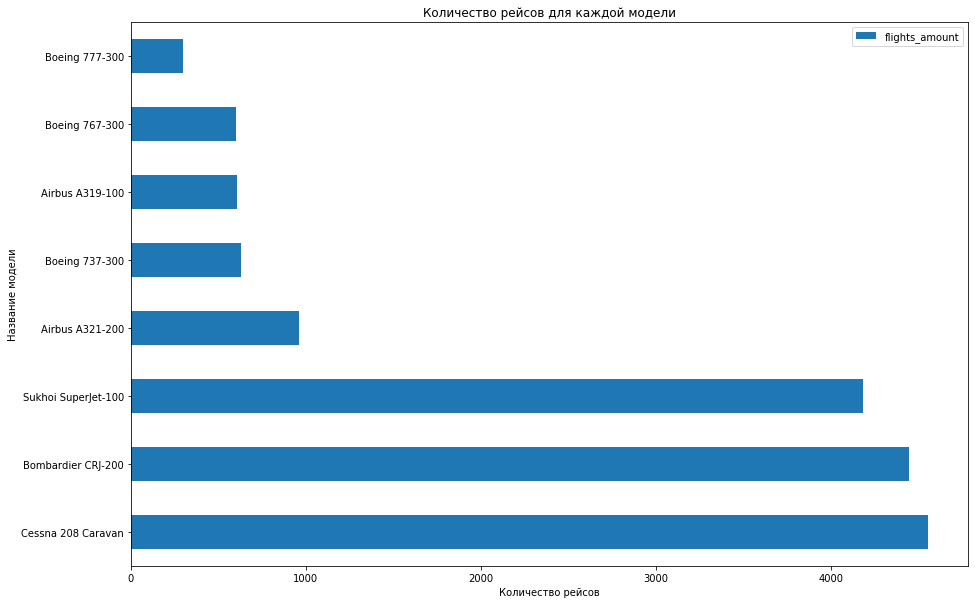

In [46]:
# Построим график для моделей самолета
query_1.sort_values('flights_amount', ascending=False).plot(x='model', y='flights_amount', kind='barh', figsize=(15,10))
plt.xlabel('Количество рейсов')
plt.ylabel('Название модели')
plt.title('Количество рейсов для каждой модели')
plt.show()

<div style="border:solid gold 2px; padding: 20px"> <h1 style="color:gold; margin-bottom:20px">Комментарий наставника</h1>

все графики стоило отобразить горизонтально, чтоб подписи удобнее читались, плюс отсортировать столбики, чтоб было удобнее сравнивать.

<div style="border:solid blue 2px; padding: 20px"> <h1 style="color:blue; margin-bottom:20px">Комментарий Ученика</h1>  Исправил

Рассмотрим топ-3 самолетов из списка:  
* [Cessna 208](https://ru.wikipedia.org/wiki/Cessna_208) - Легкий самолет, который исользуется для мелких рейсов и перевозки грузов. Судя по всему его используют как быструю курьерскую модель для  мелкогабаритных грузов.
* [Bombardier CRJ200](https://ru.wikipedia.org/wiki/Bombardier_CRJ200) - Один из наиболее популярных и надежных американских самолетов, который используется во всем мире.
* [Sukhoi Superjet 100](https://ru.wikipedia.org/wiki/Sukhoi_Superjet_100) - Самый известный российский авиалайнер.

Данный топ интересен тем, что больше всего совершается рейсов именно для **Cessna 208**, то есть не пассажирский самолет.